In [0]:
# Run if using google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Setup path

import os
import sys

# From jupyter notebook, starting from Tensor-Completion/
'''
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
'''

# From google colab
# Add parent packages to path
repository_path = "/content/drive/My Drive/Tensor-Completion"
sys.path.append(repository_path)
sys.path.append(repository_path +"/Code")

# Add lib directory, containing the required libraries, to path
libs_path = "/content/drive/My Drive/lib"
sys.path.append(libs_path)

In [0]:
try:
  import cupy as cp
except:
  pass

import cv2
import matplotlib.pyplot as plt
import numpy as np
import time

from Models.CP_WOPT import CP_WOPT_Model
from metrics import RSE
from Utils import mask_img

img shape:  (256, 256, 3)


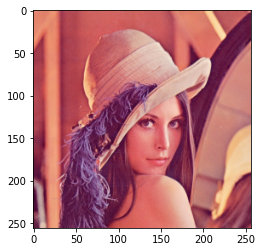

In [0]:
# Read lena image
img_path = '/content/drive/My Drive/Tensor-Completion/Code/data/lena_red.bmp'

img = cv2.imread(img_path, 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (256, 256))
plt.imshow(img)
print("img shape: ", img.shape)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


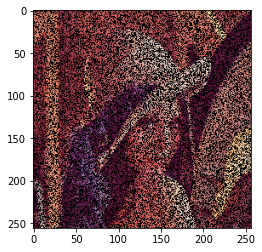

In [0]:
# If using cupy
img = cp.asarray(img)

# Mask image
missing_rate=0.5
img_missing = mask_img(img, missing_rate=missing_rate)

#plt.imshow(img_missing) # If using numpy
plt.imshow(cp.asnumpy(img_missing).astype(int)) # If using cupy

In [0]:
# Create and train model using gradient descent
model = CP_WOPT_Model(img_missing, 24, init="normal", optimization="gradient_descent", lr=1e-2)
model.train(10000)

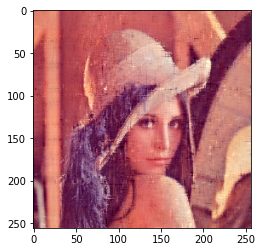

In [0]:
# Reconstruct the image using the trained model

prediction = model.predict()
prediction = np.clip(prediction, 0, 255)
plt.imshow(cp.asnumpy(prediction).astype(int))

In [0]:
# Compute the RSE of our prediction

error = RSE(img/255, prediction/255)
print("RSE:", error)

RSE: 0.09187837314503496


In [0]:
# Create and train model using ncg
model = CP_WOPT_Model(img_missing, 24, 1e-6, init="normal", optimization="ncg")
model.train(10000)

         Current function value: 68.072145
         Iterations: 10000
         Function evaluations: 30280
         Gradient evaluations: 30280


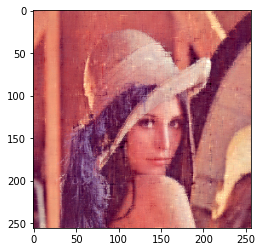

In [0]:
# Reconstruct the image using the trained model
prediction = model.predict()
prediction = np.clip(prediction, 0, 255)
plt.imshow(cp.asnumpy(prediction).astype(int))

In [0]:
# Compute the RSE of our prediction

error = RSE(img/255, prediction/255)
print("RSE:", error)

RSE: 0.08615463915997193
